# Estudos em aprendizagem não supervisionada.
## Criação de um modelo de recomendação simples de gêneros de filmes

  Tarefas desenvolvidas:
- Aplicação de algoritmos de clusterização
- Clusterização hierárquica,
- Redução de dimensionalidade,
- Visualização de Clusters
- Visualização de dendograma
- KMeans, Agglomerative Clustering, TSNE

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

In [2]:
dados = pd.read_csv('filmes.csv')

In [3]:
dados.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
dados.columns = ['filme_id', 'titulo', 'genero']

In [5]:
dados.columns

Index(['filme_id', 'titulo', 'genero'], dtype='object')

## Extraindo os gêneros dos filmes

In [6]:
generos = dados['genero'].str.get_dummies()

In [7]:
dados_dos_filmes = pd.concat([dados, generos], axis=1)

In [8]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [9]:
generos_escalados.shape

(9742, 20)

In [10]:
model = KMeans(n_clusters=3)
model.fit(generos_escalados)
print(f'Grupos {model.labels_}')

Grupos [0 0 1 ... 1 2 1]


In [11]:
print(generos.columns)
print(model.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995 -0.17289821  0.88454232  2.15276837  2.73504062  0.2915672
  -0.32935588 -0.21197981 -0.60342077  0.94538118 -0.09492563 -0.28456042
   0.2067508   0.44038434 -0.13327595 -0.26951791  0.05736057 -0.47102108
  -0.17254585 -0.07917695]
 [ 0.02313459 -0.48024129 -0.2792639  -0.24336844 -0.27045122  0.0576788
  -0.04303371  0.08089572  0.15610182 -0.14636826  0.02800249  0.05314804
  -0.11483328 -0.00794774  0.03218741  0.11401328 -0.1678273  -0.06735218
  -0.02106601 -0.00447072]
 [-0.05917995  1.88558101  0.63458927 -0.09493939 -0.26619374 -0.35343993
   0.31612938 -0.20457256 -0.30361985  0.1067061  -0.06071054 -0.06627846
   0.33454512 -0.17662551 -0.05845355 -0.30203347  0.60371743  0.47393084
   

In [12]:
grupos = pd.DataFrame(model.cluster_centers_, columns=generos.columns)

In [13]:
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.172898,0.884542,2.152768,2.735041,0.291567,-0.329356,-0.211980,-0.603421,0.945381,-0.094926,-0.284560,0.206751,0.440384,-0.133276,-0.269518,0.057361,-0.471021,-0.172546,-0.079177
1,0.023135,-0.480241,-0.279264,-0.243368,-0.270451,0.057679,-0.043034,0.080896,0.156102,-0.146368,0.028002,0.053148,-0.114833,-0.007948,0.032187,0.114013,-0.167827,-0.067352,-0.021066,-0.004471
2,-0.059180,1.885581,0.634589,-0.094939,-0.266194,-0.353440,0.316129,-0.204573,-0.303620,0.106706,-0.060711,-0.066278,0.334545,-0.176626,-0.058454,-0.302033,0.603717,0.473931,0.160060,0.053924


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CA454D248>,
      dtype=object)

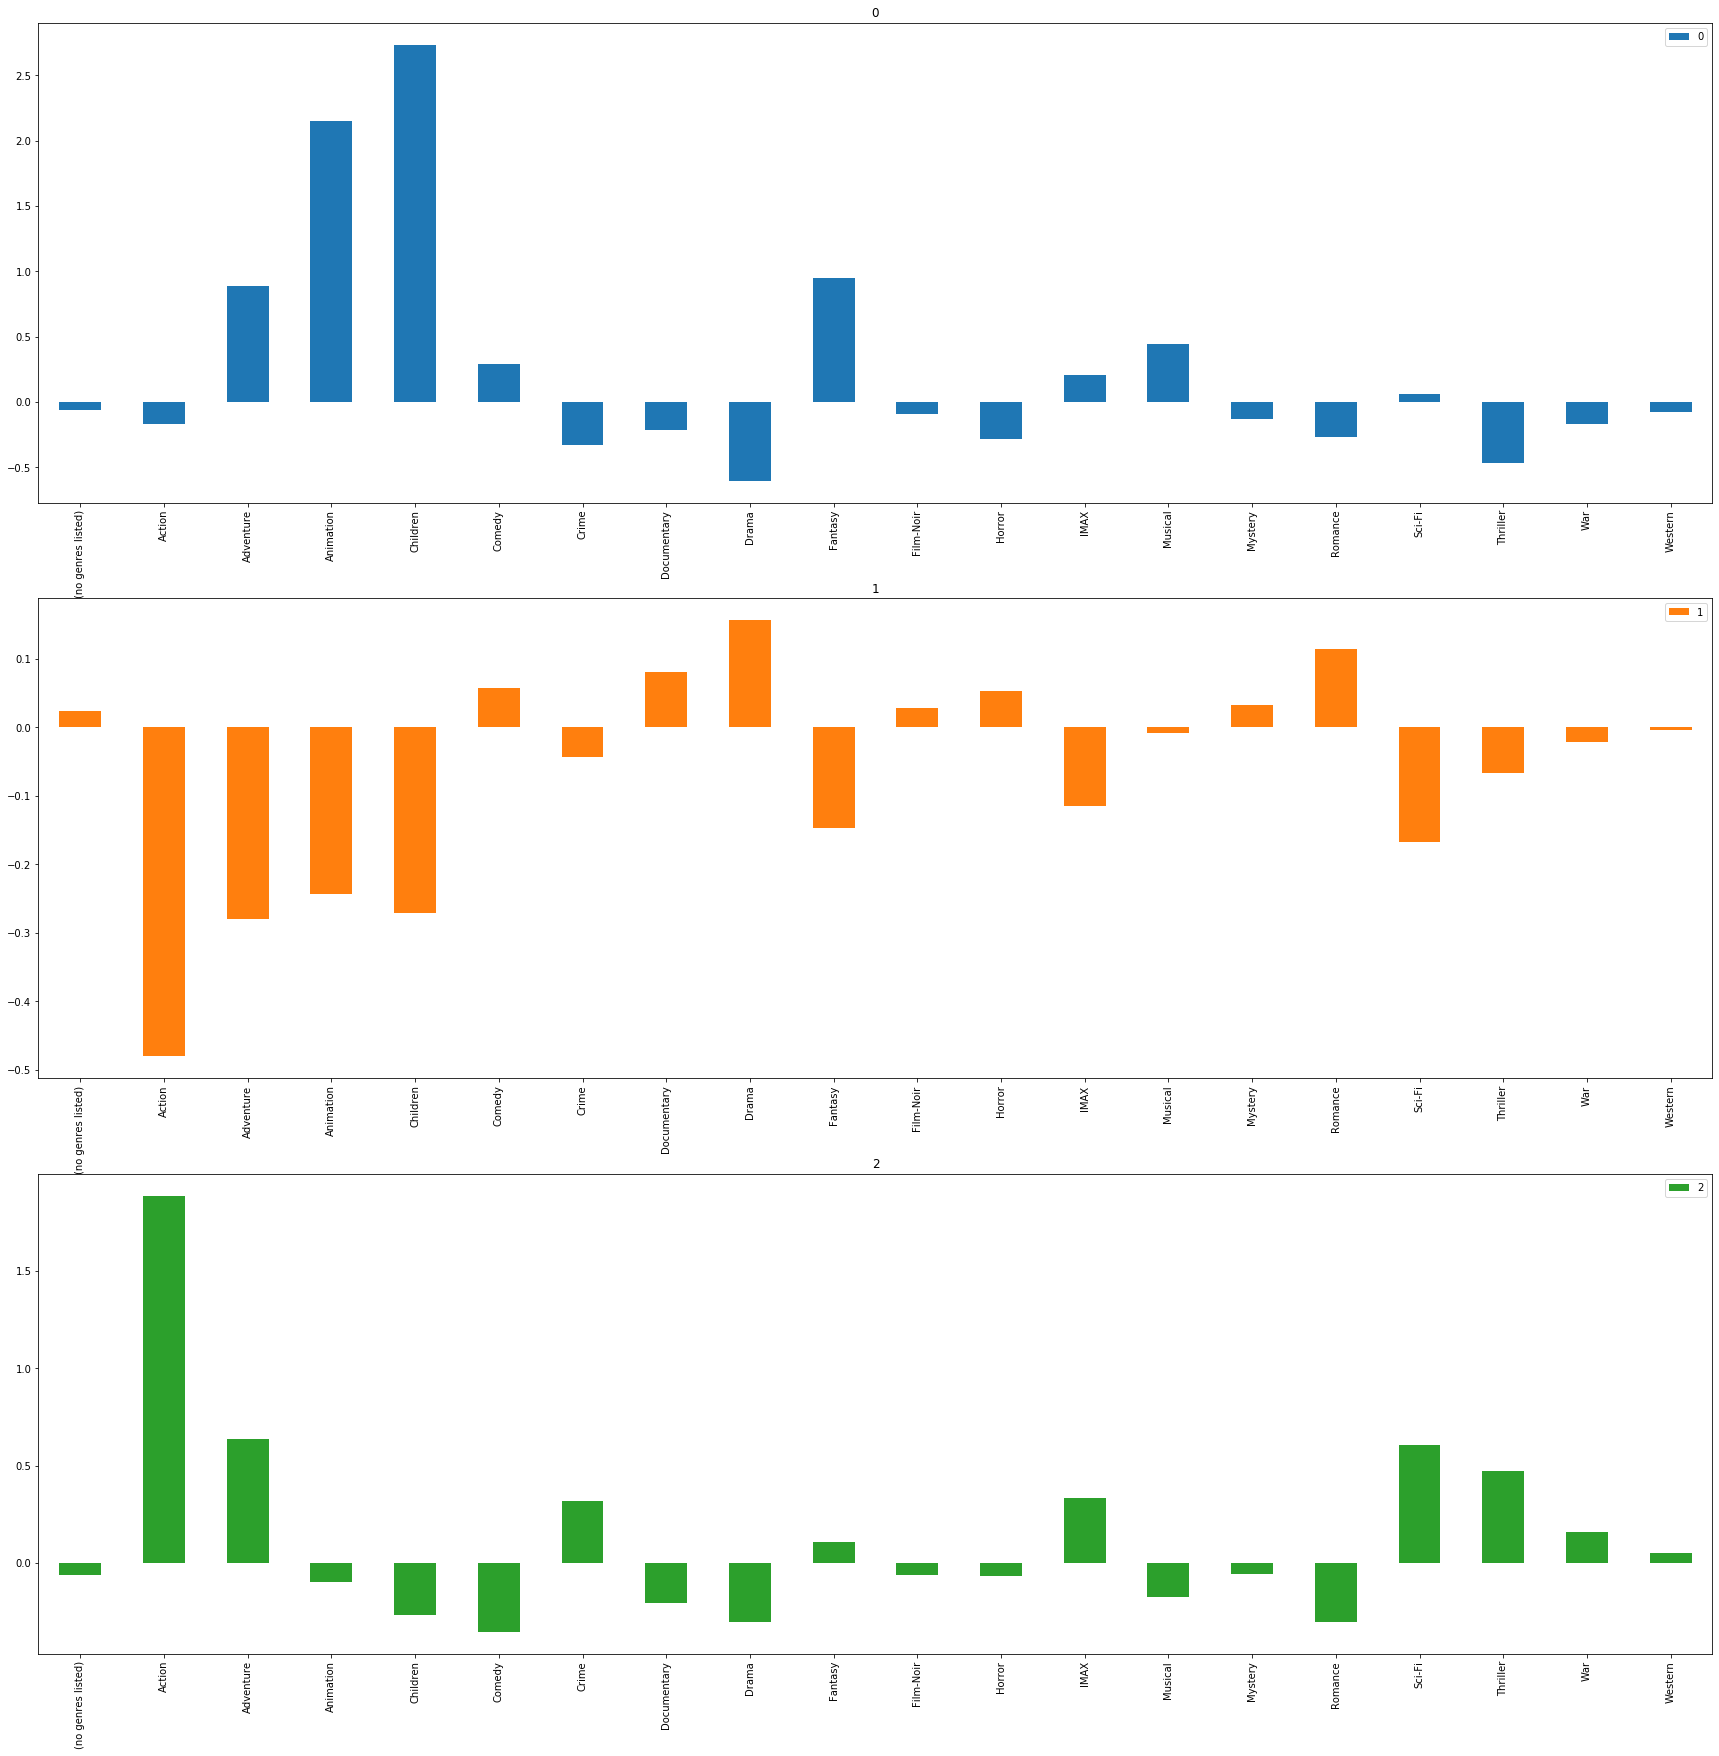

In [14]:
# verificar a distribuição dos filmes nos 3 grupos
grupos.transpose().plot.bar(subplots=True, # Divide em sub-graficos
                figsize=(30,30), # Tupla com o tamanho da visualização 
                sharex=False, # Não compartilhar a informação do eixo X (cada plot terá o seu valor exibido)
               )

### Pelo gráfico acima podemos dizer que os grupos gerados pelo algoritmo possuem algumas categorias mais recorrentes como:
- Grupo 0 - Possui grande quantidade de filmes classificados como **Animation, Children,  Adventure, Fantasy**  
- Grupo 1 - Possui grande quantidade de filmes classificados como **Thriller, Crime, Action, Film-Noir,Horror, Sci-Fi**  
- Grupo 1 - Possui grande quantidade de filmes classificados como **Comedy, Romance, Documentary, Drama**

## Visualizando os dados
### Uma dificuldade que é encontrado nesse dataset é sua alta dimensionalidade, pelo fato de existir 20 categorias de filmes diferentes, para fins de estudo será criado um  processo de exibição em um formato de dispersão e por isso será usado o TSNE para reduzir a dimensionalidade e facilitar a visualização dos dados

In [15]:
tsne = TSNE()
dados_tsne = tsne.fit_transform(generos_escalados)
dados_tsne

array([[-17.422344,  28.682657],
       [ 18.627523, -33.74495 ],
       [ 15.125501,  -8.868519],
       ...,
       [-18.254509,  -1.621145],
       [-13.255572, -49.63395 ],
       [ 12.942824,  20.302786]], dtype=float32)

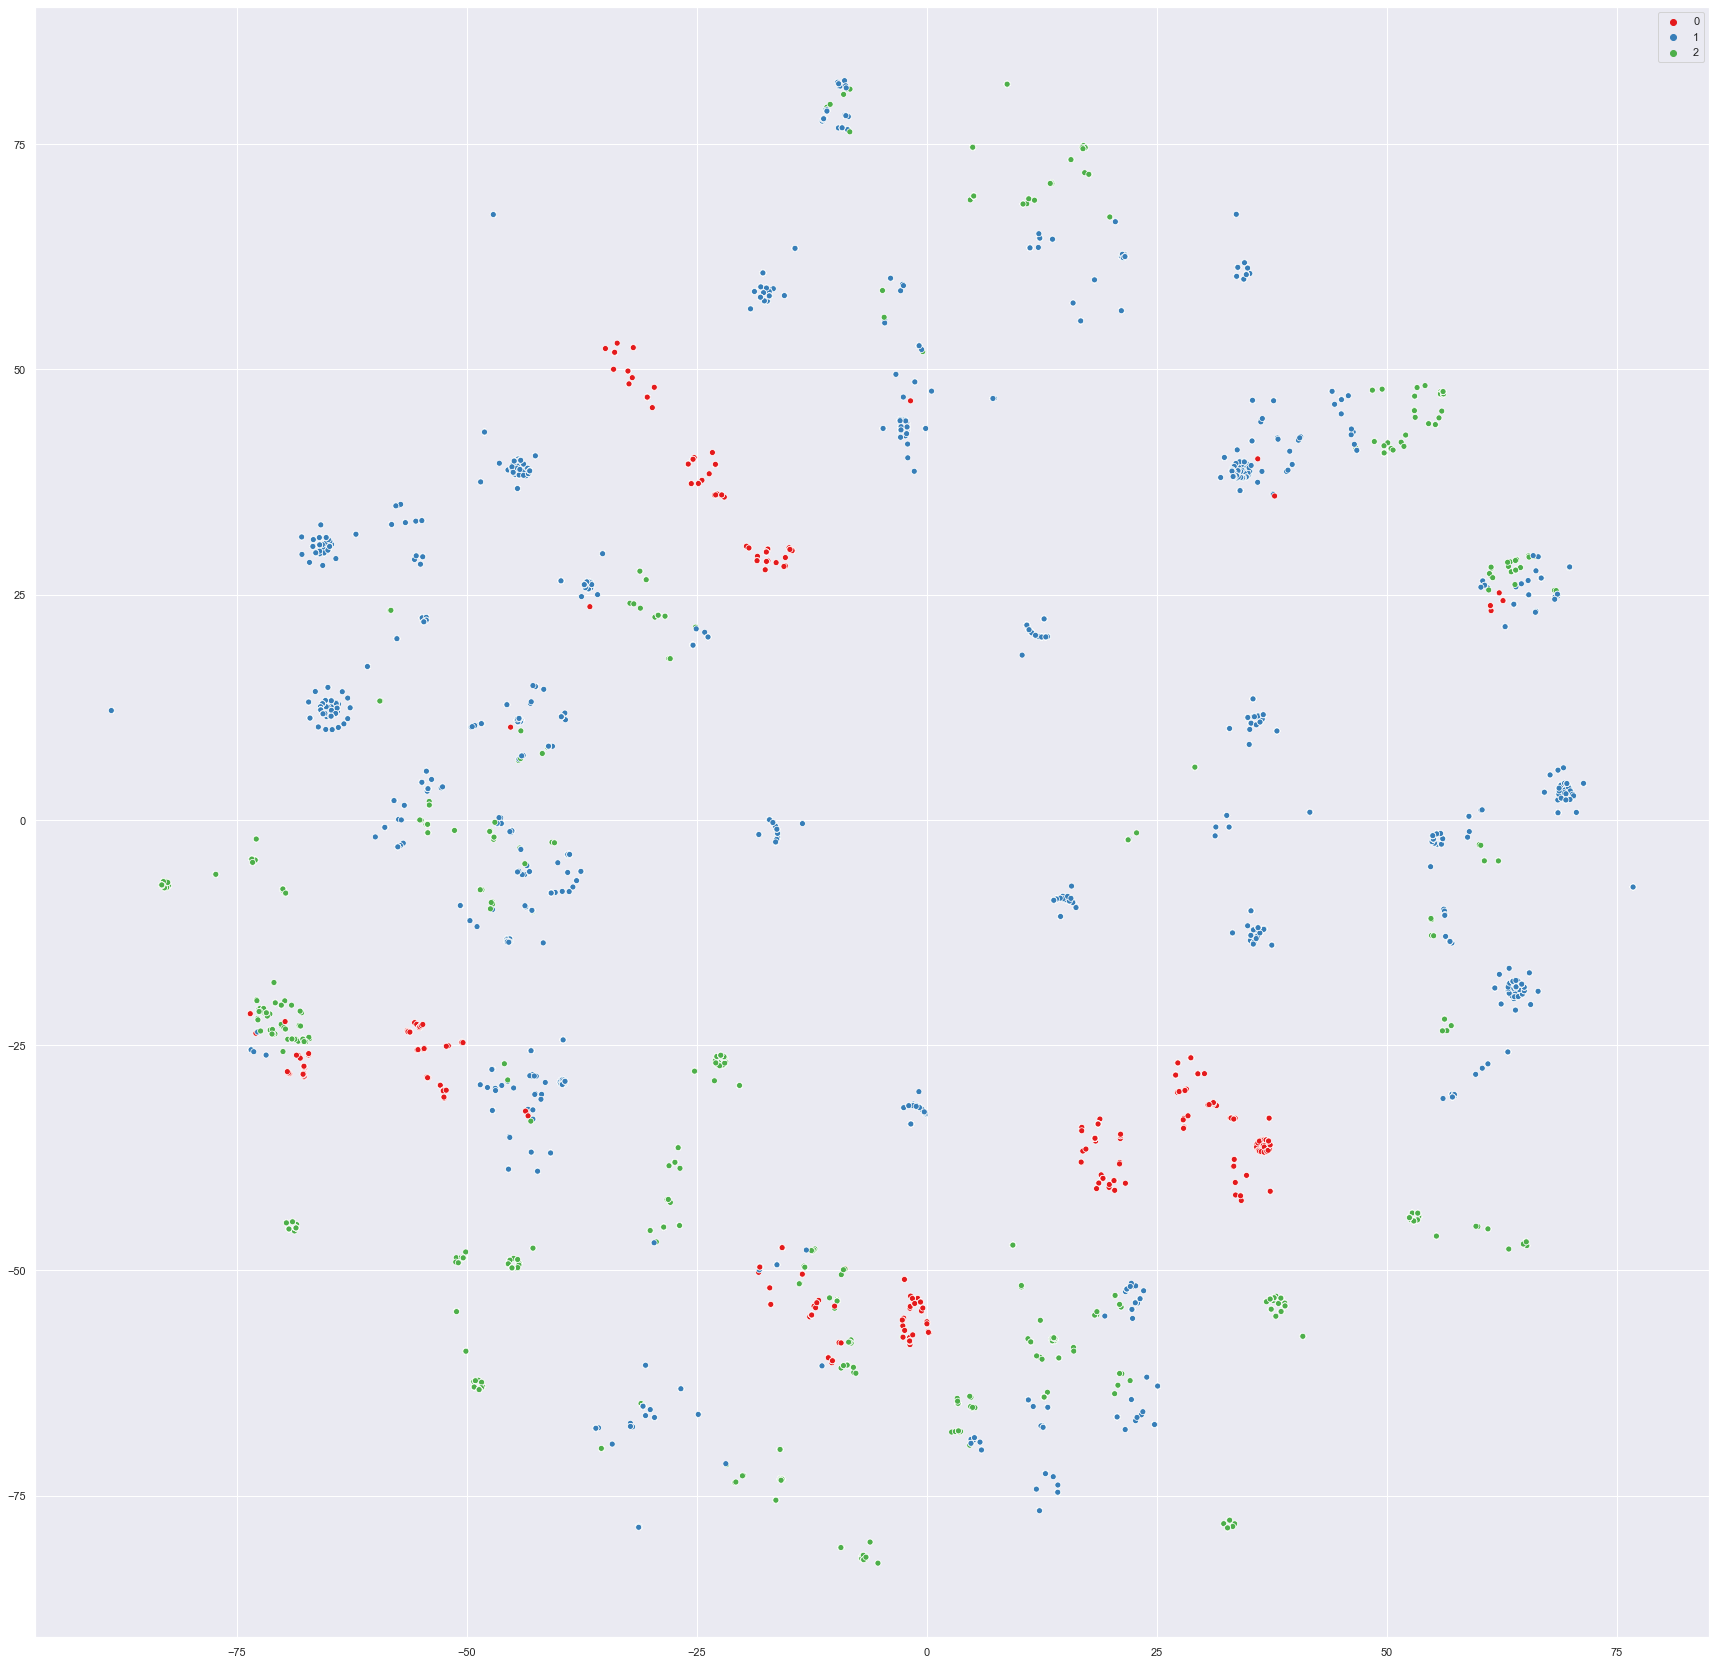

In [16]:
sns.set(rc={'figure.figsize': (30,30)})
sns.scatterplot(x=dados_tsne[:,0], 
                y=dados_tsne[:,1], 
               hue=model.labels_, 
               palette=sns.color_palette('Set1', 3))

### Como a redução de dimensionalidade pode causar perdas de informação, isso pode fazer o gráfico mostrar casos curiosos, como um grupo com elemntos de outros clusters distintos, mas isso é causado pela redução das dimensões, os dados verdadeiros poderiam apresentar uma distribuição totalmente diferente.

## Teste com 20 grupos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CA4F60B88>,
      dtype=object)

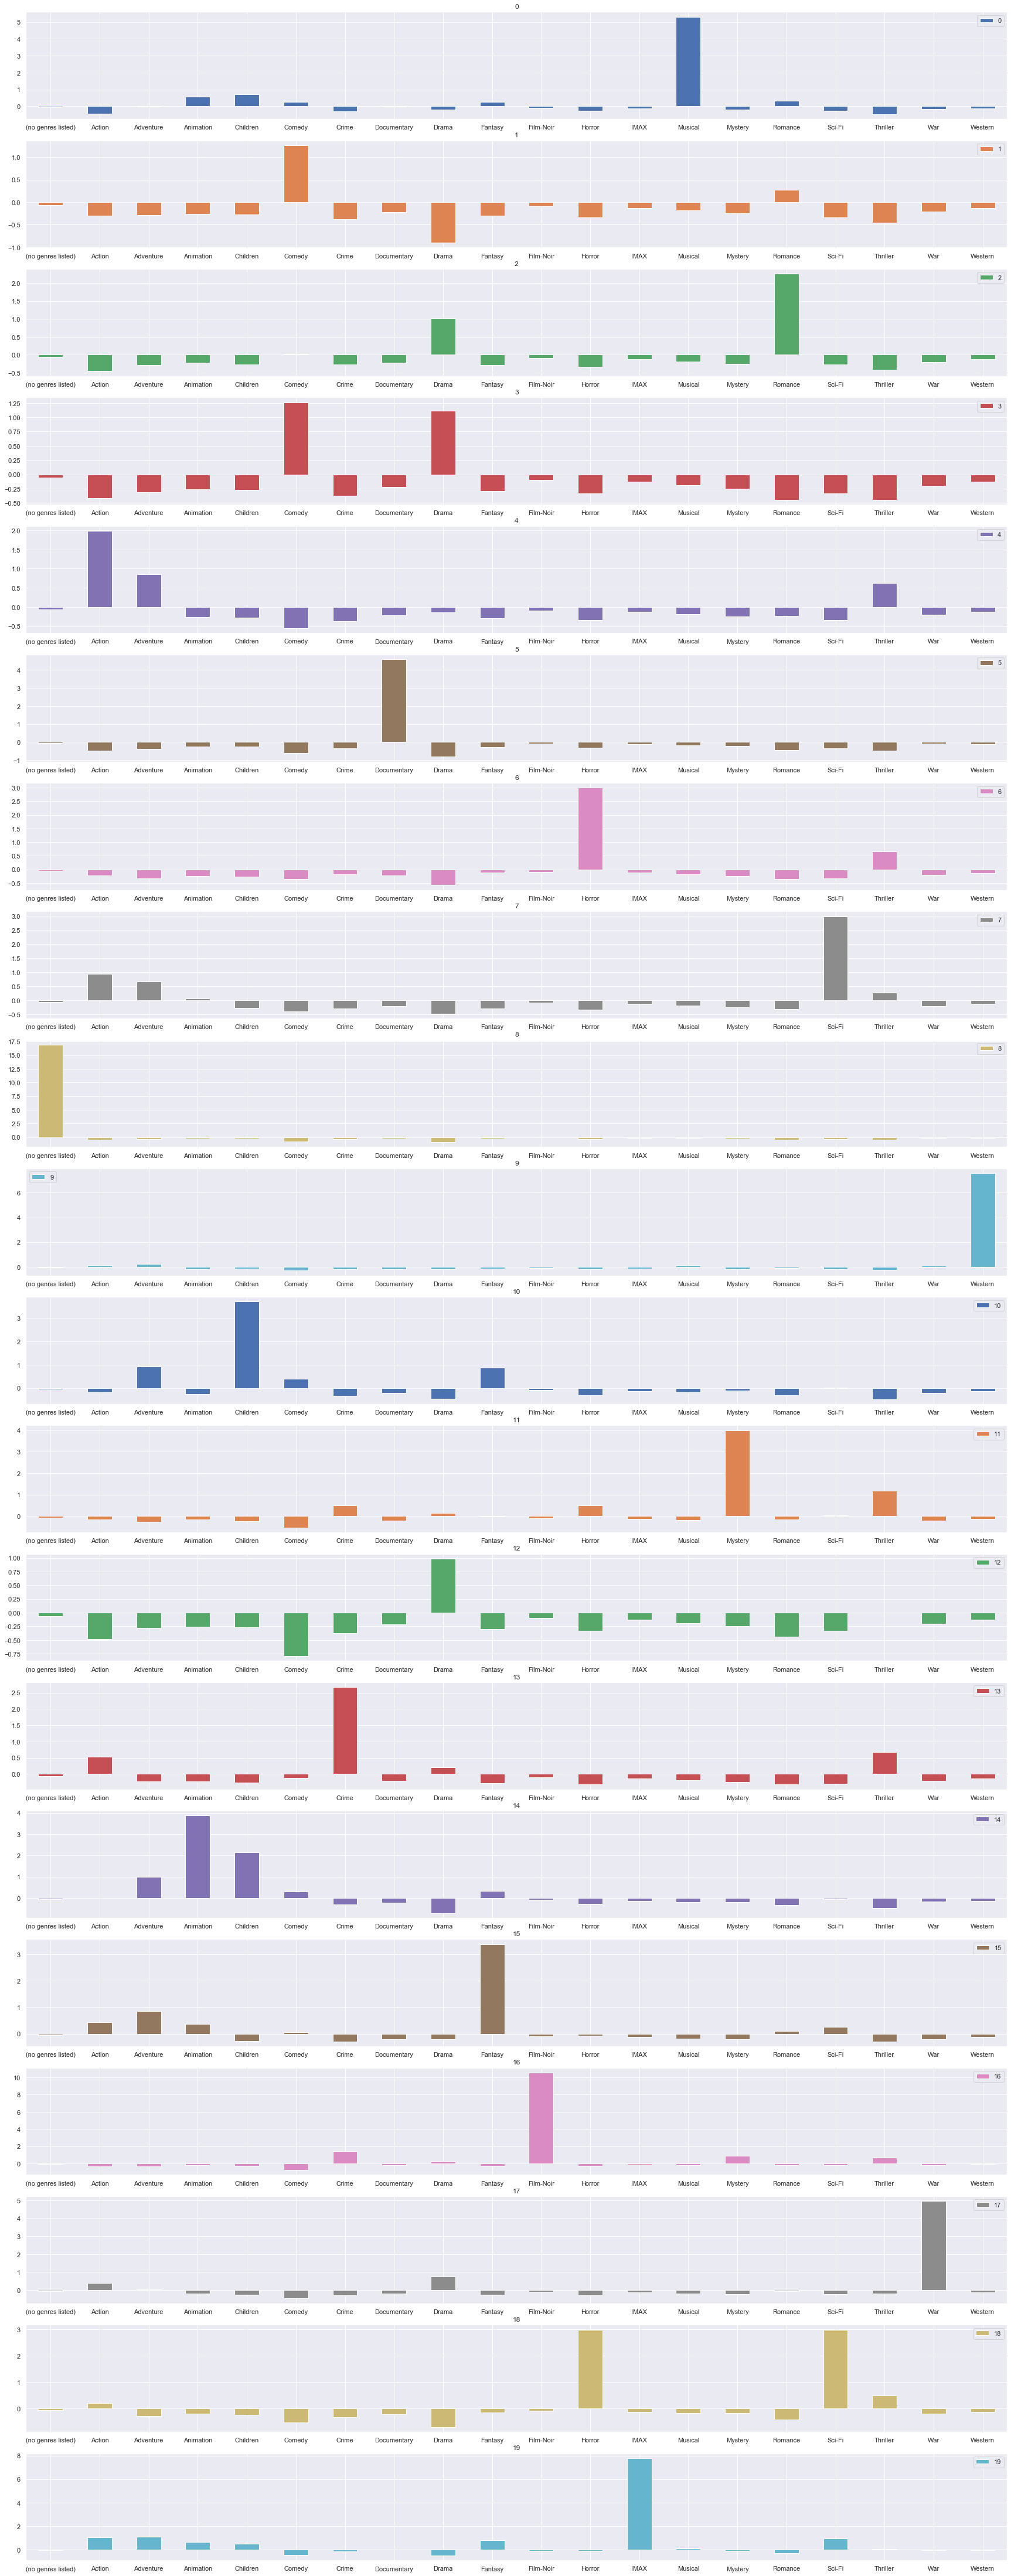

In [17]:
model = KMeans(n_clusters=20)
model.fit(generos_escalados)

grupos = pd.DataFrame(model.cluster_centers_, columns=generos.columns)

grupos.transpose().plot.bar(
    
    subplots=True, # Divide em sub-graficos
    figsize=(30,80),# Tupla com o tamanho da visualização 
    sharex=False, # Não compartilhar a informação do eixo X (cada plot terá o seu valor exibido)
    rot=0 # rotação da legenda do eixo X 
    )

In [18]:
# pegar uma amostra para verificar a classificação
dados_dos_filmes[model.labels_ == 2]. sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6931,64993,5 Centimeters per Second (Byôsoku 5 senchimêto...,Animation|Drama|Romance,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2234,2969,"Man and a Woman, A (Un homme et une femme) (1966)",Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4015,5673,Punch-Drunk Love (2002),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1887,2506,"Other Sister, The (1999)",Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6728,59018,"Visitor, The (2007)",Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6204,45382,Down in the Valley (2005),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
608,764,Heavy (1995),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8567,116724,You Are the Apple of My Eye (2011),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4719,7038,Things You Can Tell Just by Looking at Her (2000),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5610,27020,Gia (1998),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Método do cotovelo (Elbow Method) para descobrir a quantidade ideal de clusters

In [19]:
# método que retorna a quantidade de clusters usados e o erro médio ao quadrado
def retorna_erro(n_clusters, dados):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(dados)
    erro = kmeans.inertia_
    return [n_clusters, erro]

In [20]:
teste = retorna_erro(3,generos_escalados)

In [21]:
teste

[3, 166516.5661264724]

In [22]:
# Teste com vários valores de grupos
erros = [retorna_erro(i, generos_escalados) for i in range(1,51)]

In [23]:
erros = pd.DataFrame(erros, columns=['grupos', 'inertia'])

In [24]:
erros.head()

,grupos,inertia
0,1,194840.000000
1,2,179909.549964
2,3,166397.870534
3,4,156514.683995
4,5,147766.829075


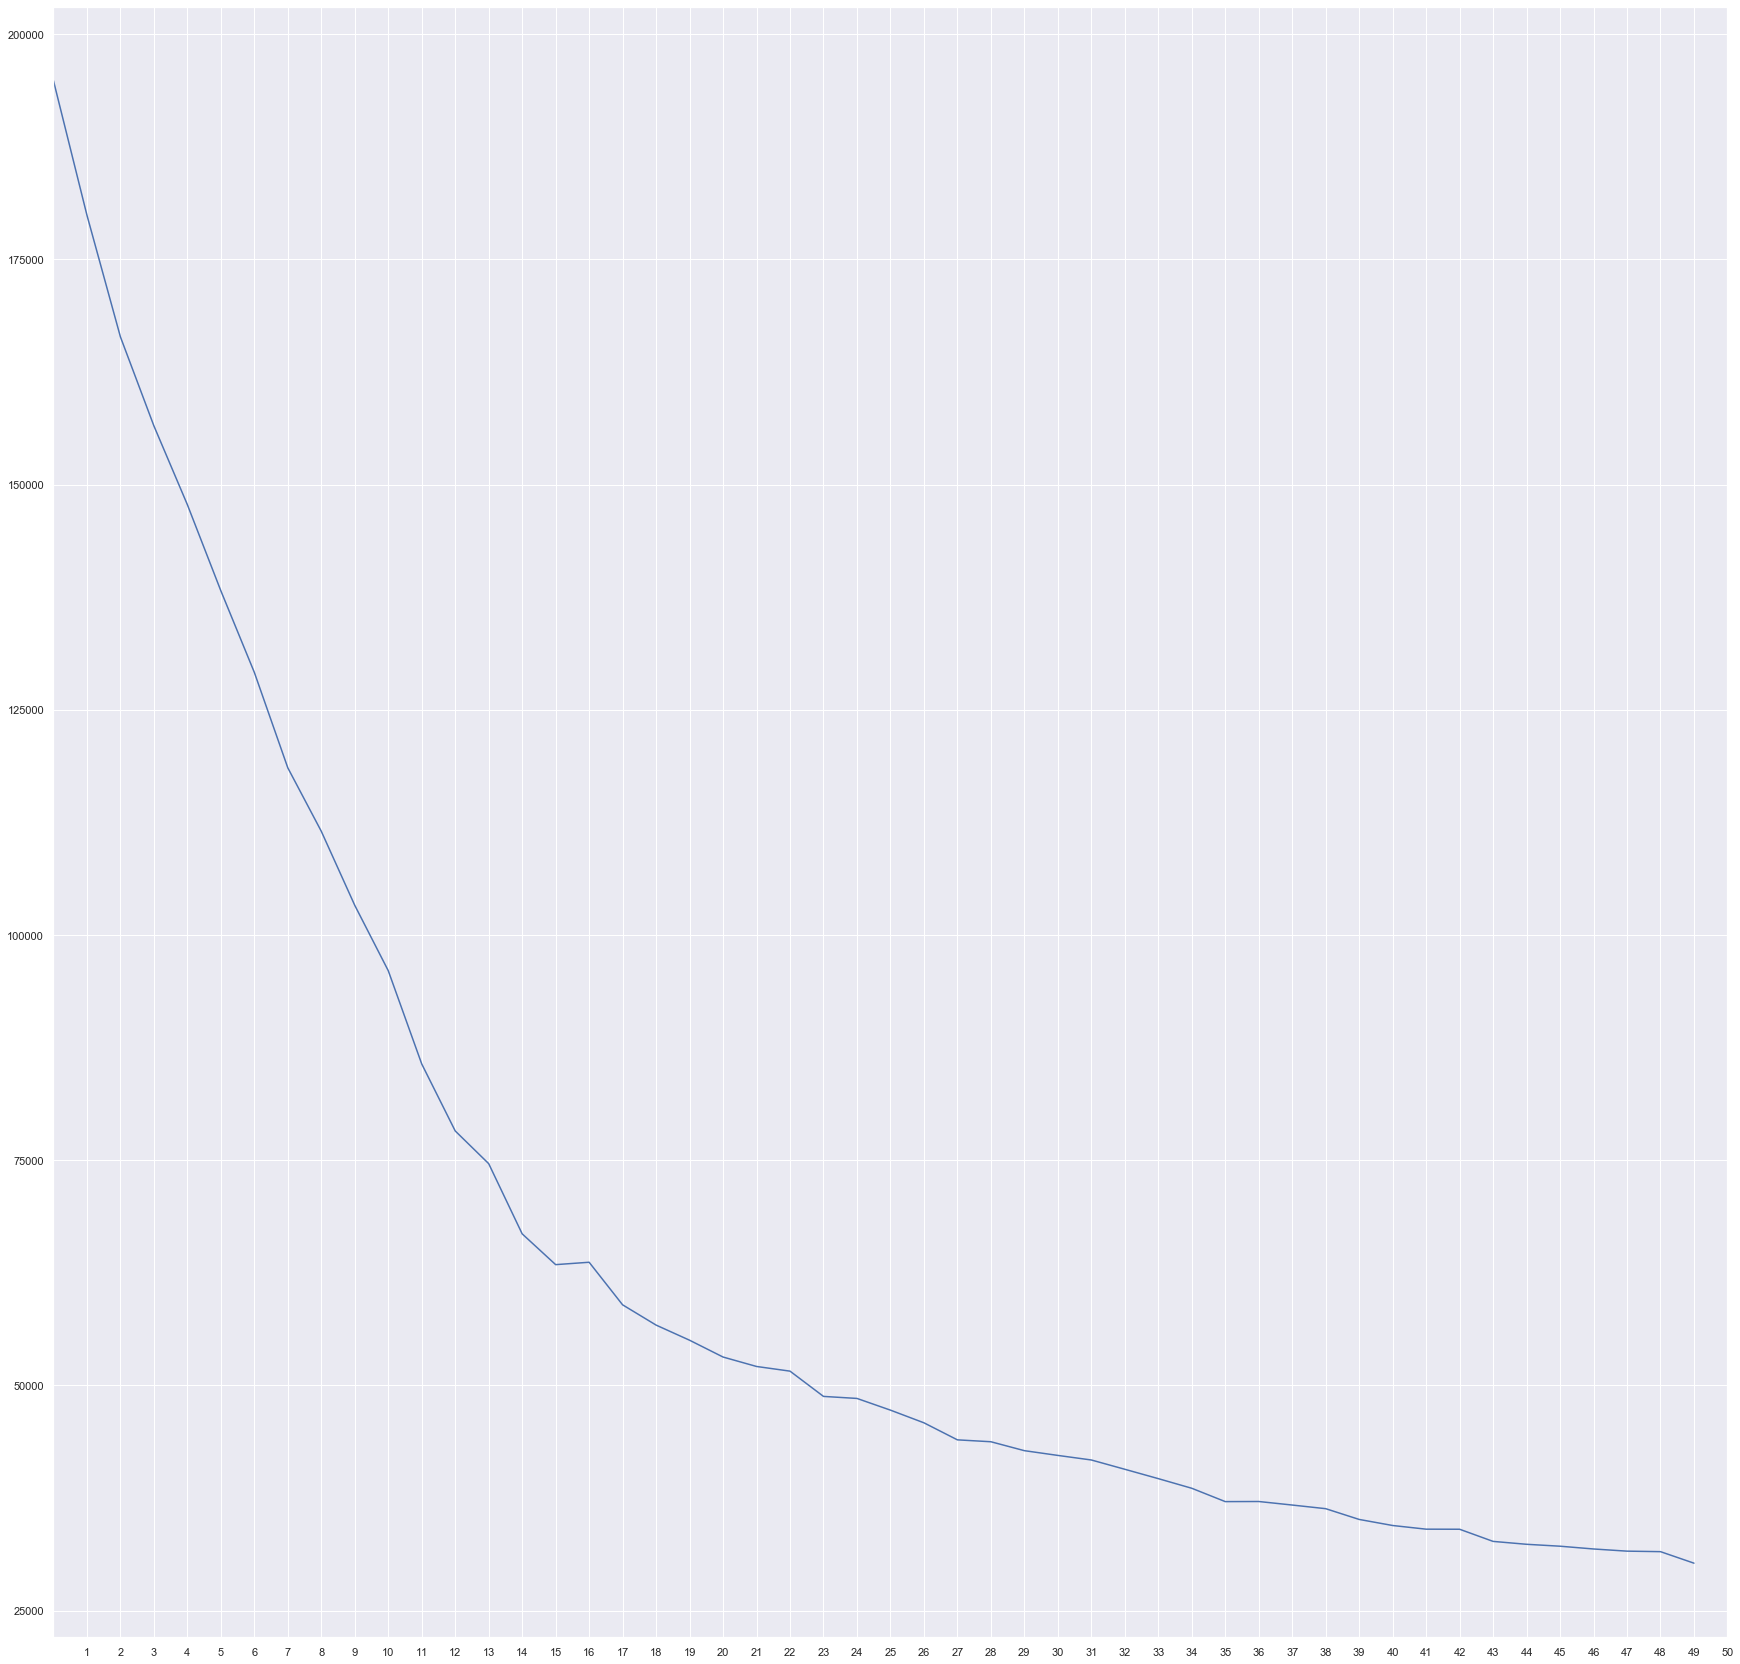

In [25]:
# Plota o grafico para ver o erros com relação a quantidade de clusters
erros['inertia'].plot(xticks=erros['grupos'])

### Pelo grafico podemos ver que a quebra do ciclo de queda do erro acontece com 16 clusters.
### Teste com os 16 clusters

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CA467F2C8>,
      dtype=object)

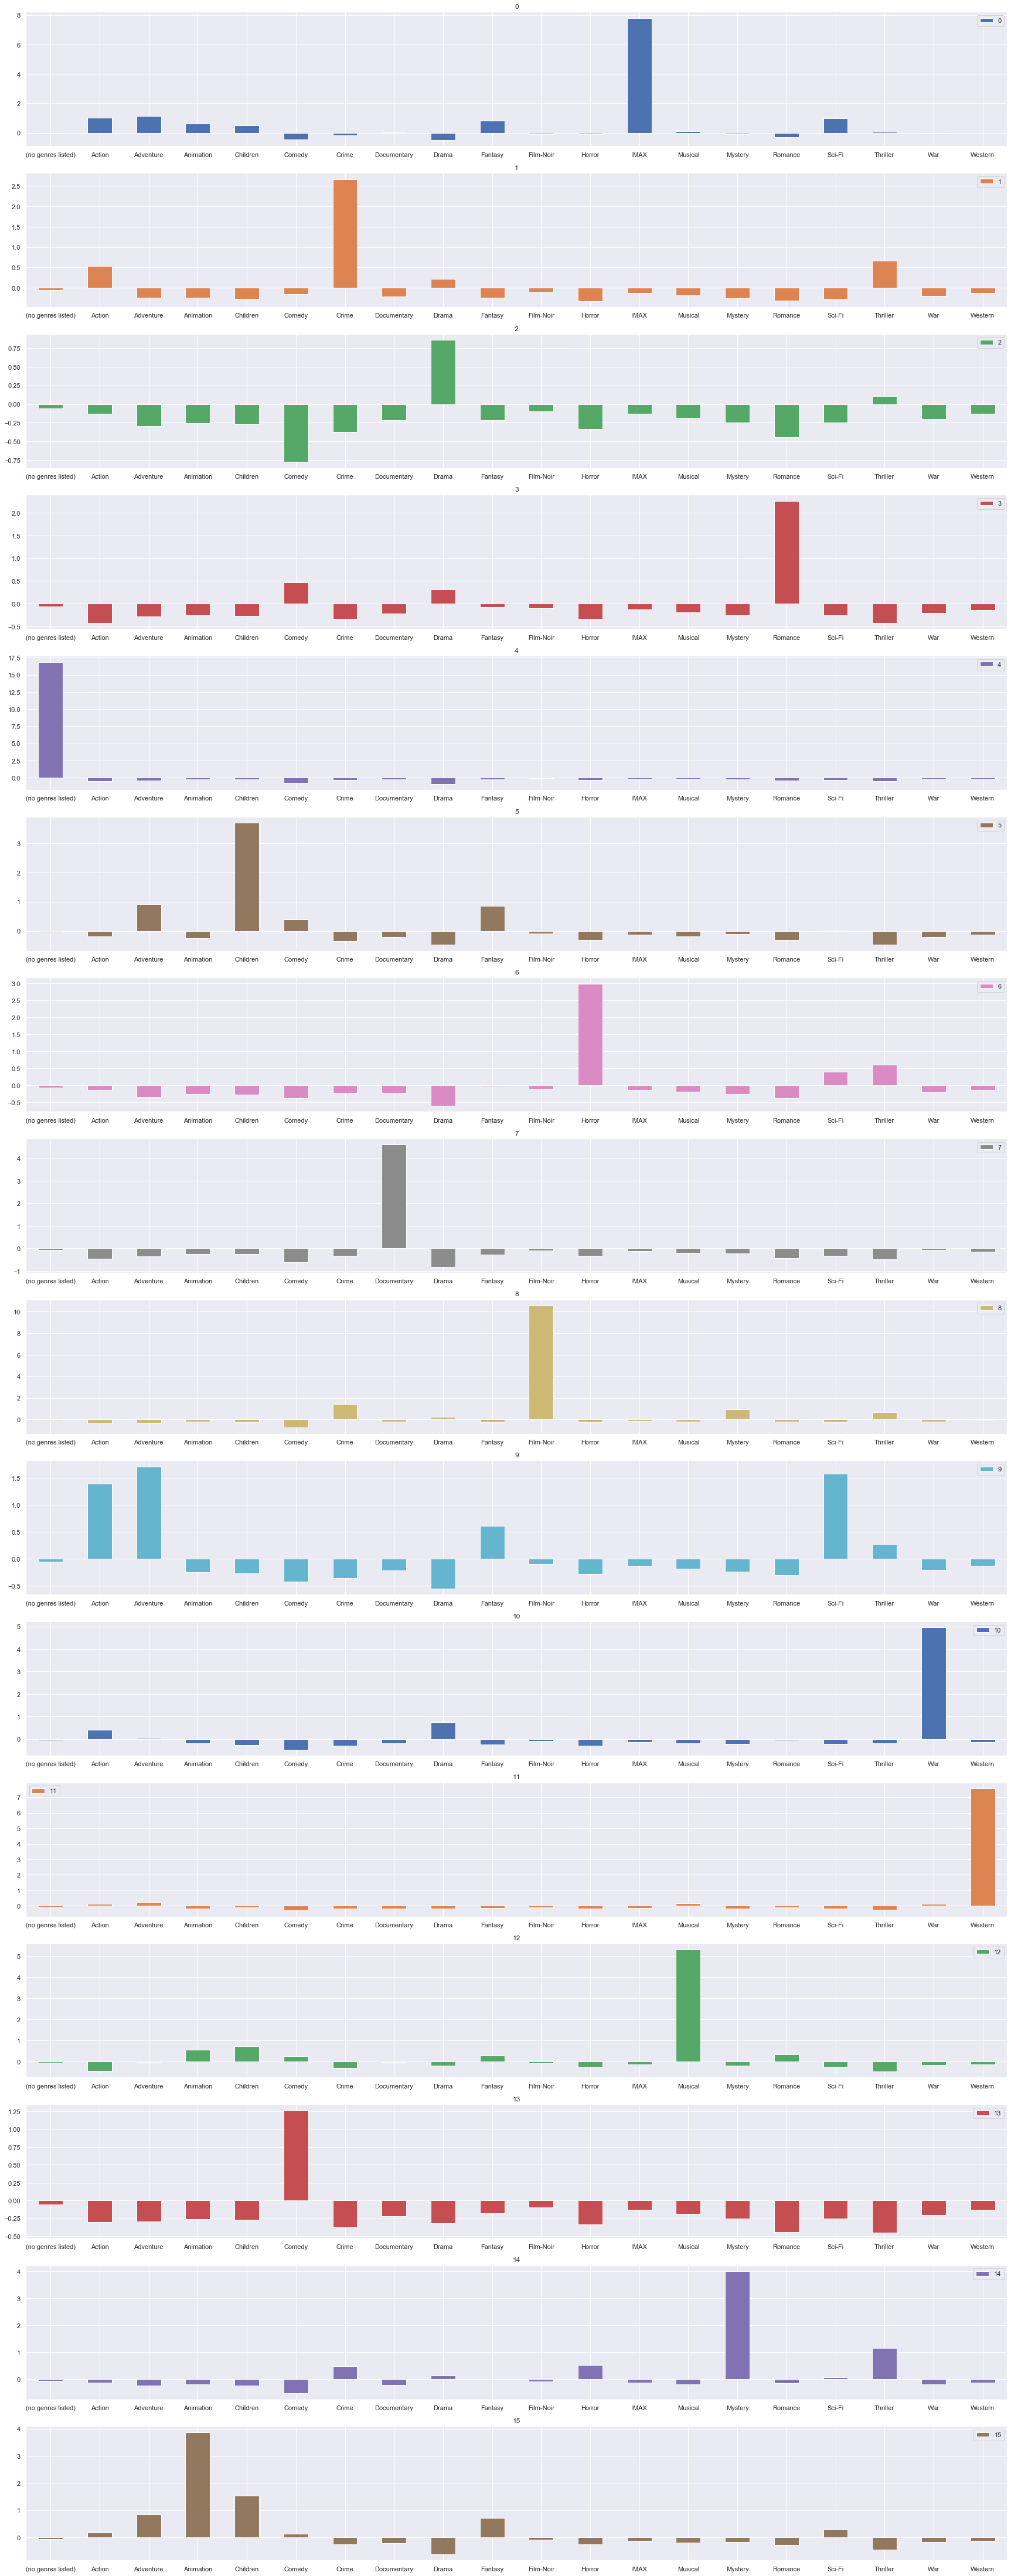

In [26]:
model = KMeans(n_clusters=16)
model.fit(generos_escalados)

grupos = pd.DataFrame(model.cluster_centers_, columns=generos.columns)

grupos.transpose().plot.bar(
    
    subplots=True, # Divide em sub-graficos
    figsize=(30,80),# Tupla com o tamanho da visualização 
    sharex=False, # Não compartilhar a informação do eixo X (cada plot terá o seu valor exibido)
    rot=0 # rotação da legenda do eixo X 
    )

In [27]:
# 2 - Comedy
dados_dos_filmes[model.labels_ == 2]. sample(100)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7348,78218,Unthinkable (2010),Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9496,170697,Gifted (2017),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1290,1719,"Sweet Hereafter, The (1997)",Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6187,44931,Secrets of a Soul (Geheimnisse einer Seele) (1...,Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9074,142536,Burnt (2015),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,326,To Live (Huozhe) (1994),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2366,3138,Stealing Home (1988),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9354,161290,Vigilante Diaries (2016),Action,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,365,Little Buddha (1993),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Agrupamento hierárquico
### Um algoritmo de agrupamento hierárquico vai calcular uma matriz de distancia e definir as distancias de um cluster para os demais.

In [28]:
model = AgglomerativeClustering(n_clusters=16)
grupos = model.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  0,  5,  0], dtype=int64)

In [29]:
tsne = TSNE()
dados_tsne = tsne.fit_transform(generos_escalados)
dados_tsne

array([[-68.26842  ,   7.5556526],
       [ 26.293514 ,  36.31752  ],
       [ -9.426553 , -43.975395 ],
       ...,
       [ 15.921474 ,  13.403668 ],
       [-20.498823 ,  52.988853 ],
       [-13.31696  ,  -8.024418 ]], dtype=float32)

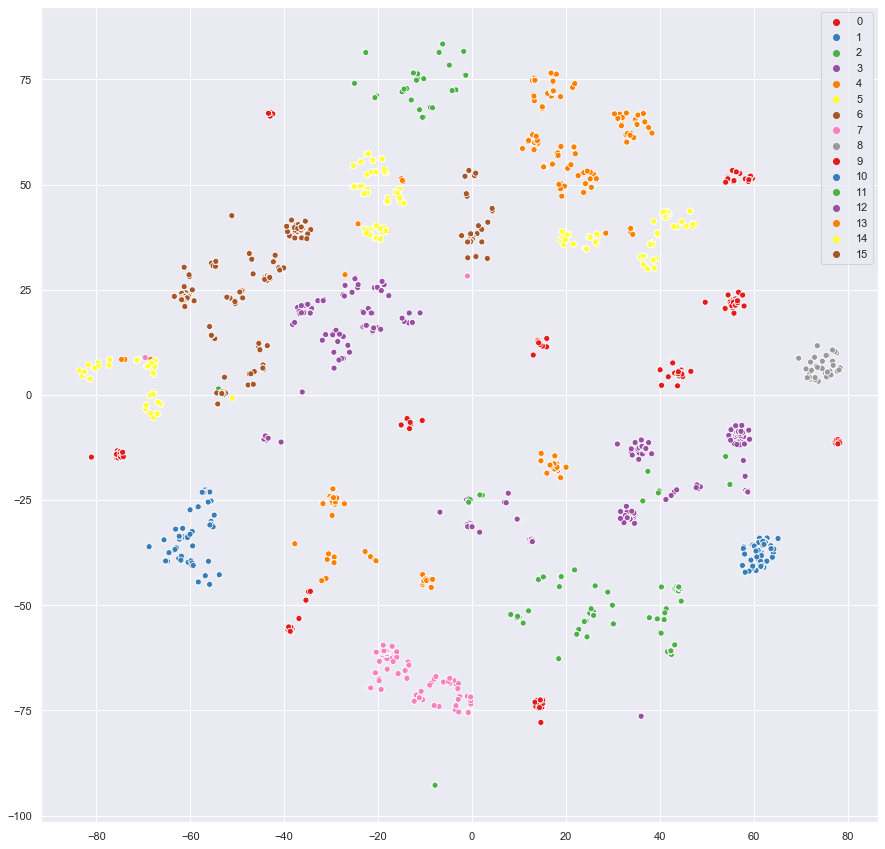

In [30]:
sns.set(rc={'figure.figsize': (15,15)})
sns.scatterplot(
    x=dados_tsne[:,0], 
    y=dados_tsne[:,1], 
    hue=grupos, 
    palette=sns.color_palette('Set1', 16)
    )

### Realmente é possível visualizar os clusters com essa técnica, mas o não conseguimos ver as distâncias entre os clusters.
## Dendograma
### Para poder ver os grupos com suas respectivas proximidades entre si.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CAA558A88>,
      dtype=object)

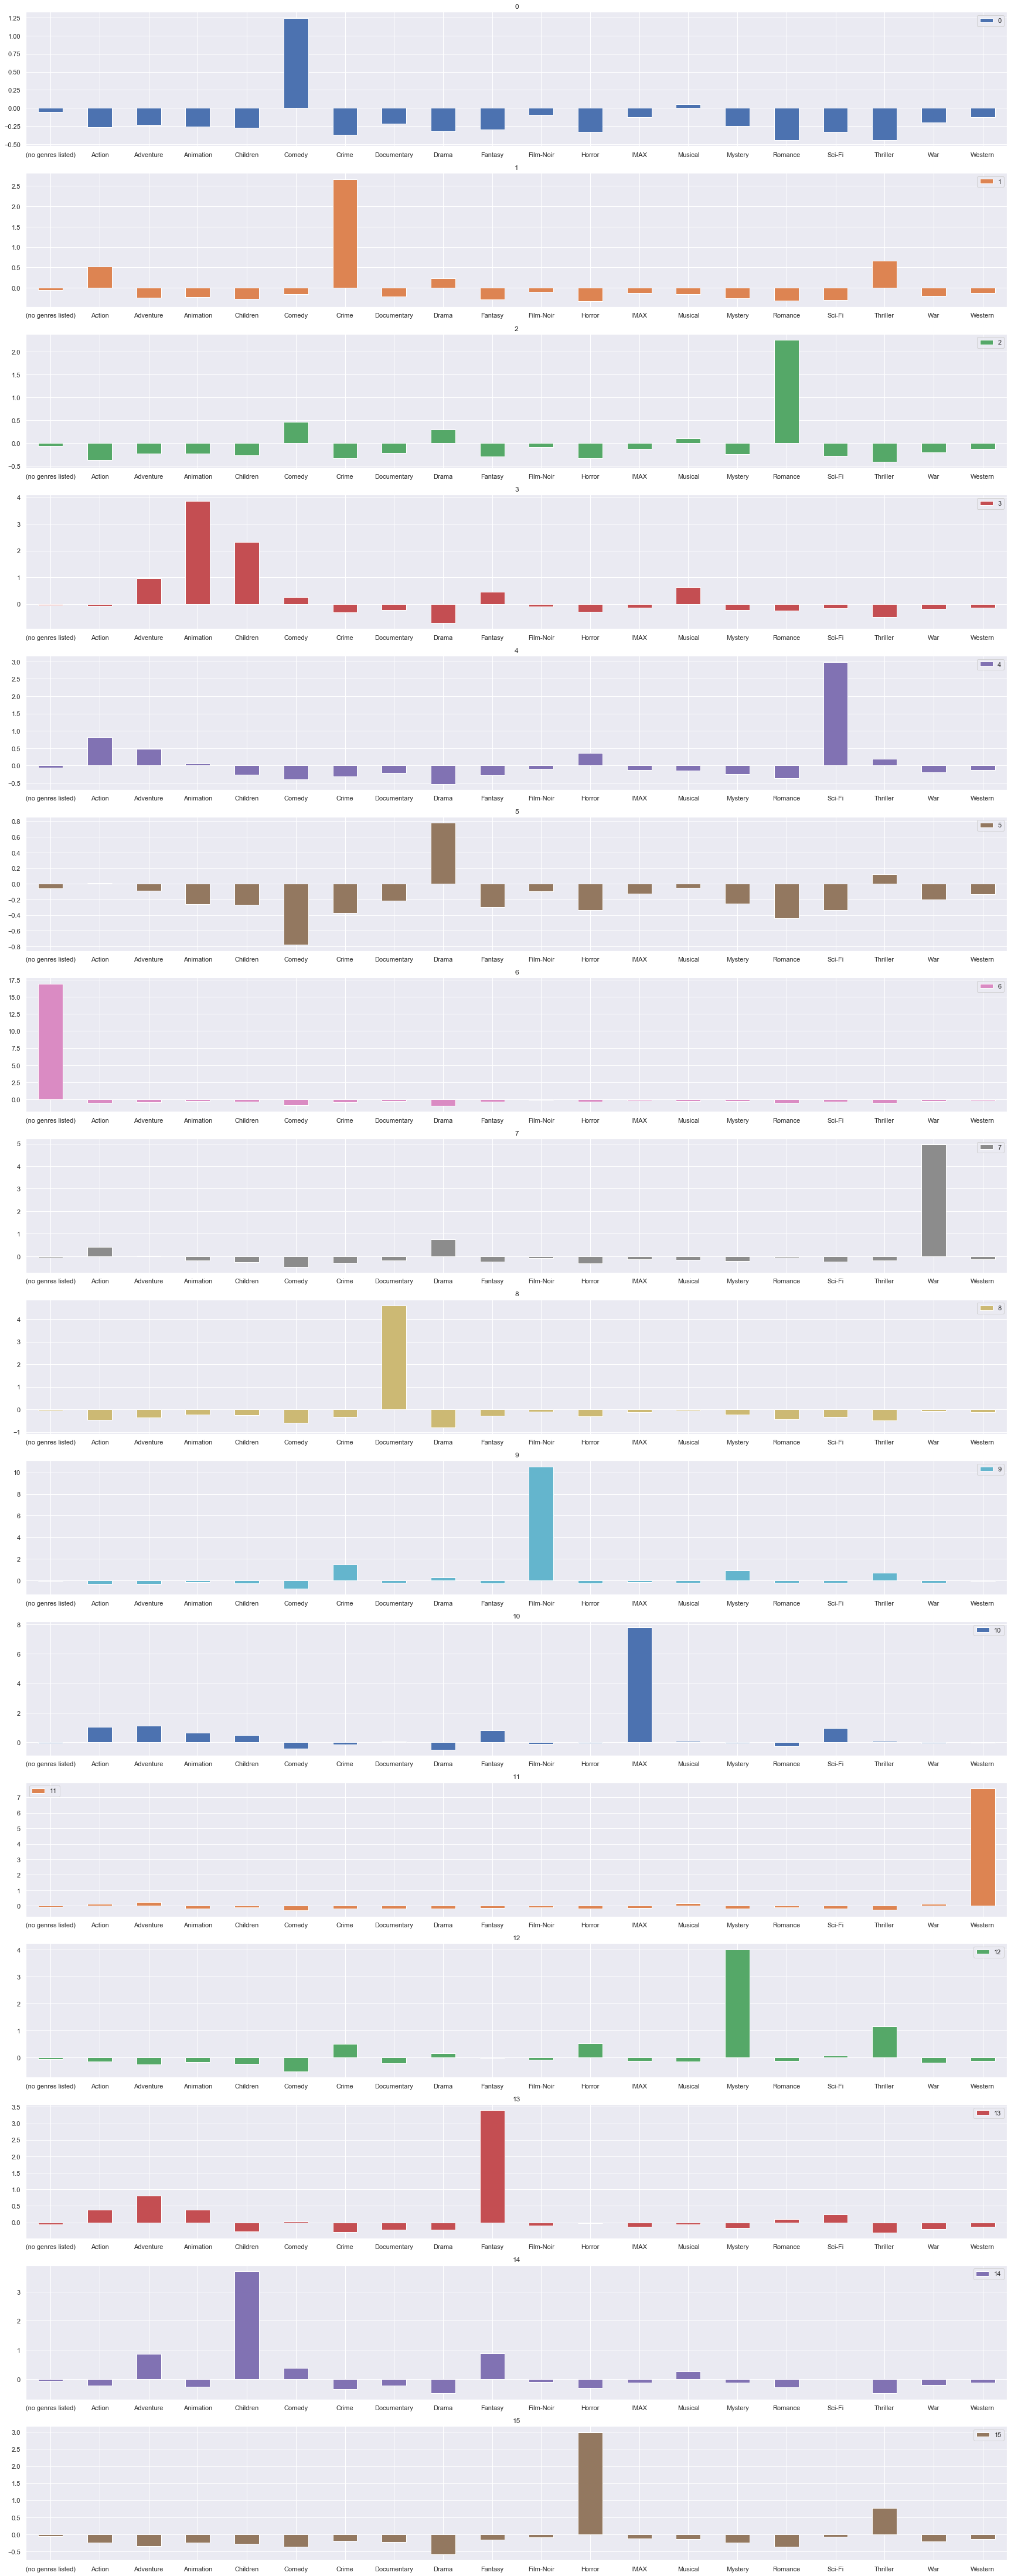

In [31]:
# primeiro criar os grupos com KMeans
model = KMeans(n_clusters=16)
model.fit(generos_escalados)

grupos = pd.DataFrame(model.cluster_centers_, columns=generos.columns)

grupos.transpose().plot.bar(
    
    subplots=True, # Divide em sub-graficos
    figsize=(30,80),# Tupla com o tamanho da visualização 
    sharex=False, # Não compartilhar a informação do eixo X (cada plot terá o seu valor exibido)
    rot=0 # rotação da legenda do eixo X 
    )

In [32]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 0.        ,  5.        ,  2.39565039,  2.        ],
       [ 2.        , 16.        ,  2.88303532,  3.        ],
       [ 1.        , 17.        ,  3.2490256 ,  4.        ],
       [15.        , 18.        ,  3.71442924,  5.        ],
       [ 4.        , 19.        ,  3.8054126 ,  6.        ],
       [13.        , 20.        ,  4.18751969,  7.        ],
       [14.        , 21.        ,  4.3970829 ,  8.        ],
       [ 3.        , 22.        ,  4.40045737,  9.        ],
       [12.        , 23.        ,  4.63527393, 10.        ],
       [ 8.        , 24.        ,  5.13914858, 11.        ],
       [ 7.        , 25.        ,  5.20641881, 12.        ],
       [11.        , 26.        ,  7.82013095, 13.        ],
       [10.        , 27.        ,  8.34810976, 14.        ],
       [ 9.        , 28.        , 10.8156615 , 15.        ],
       [ 6.        , 29.        , 17.06120863, 16.        ]])

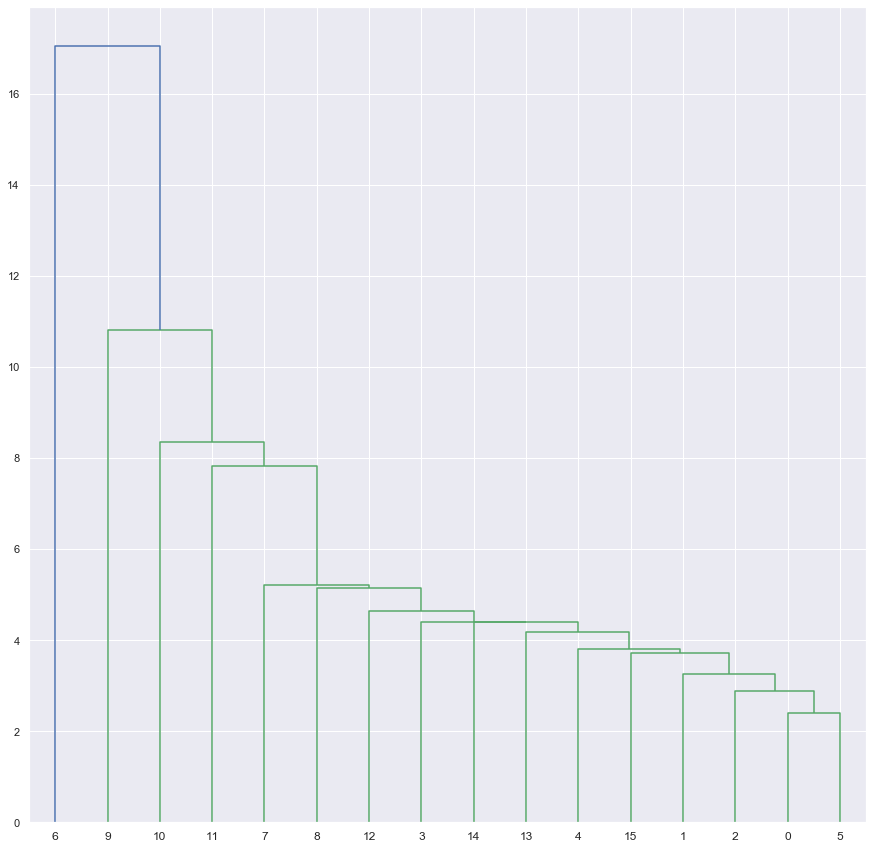

In [33]:
dendograma = dendrogram(matriz_de_distancia)